Question 1：

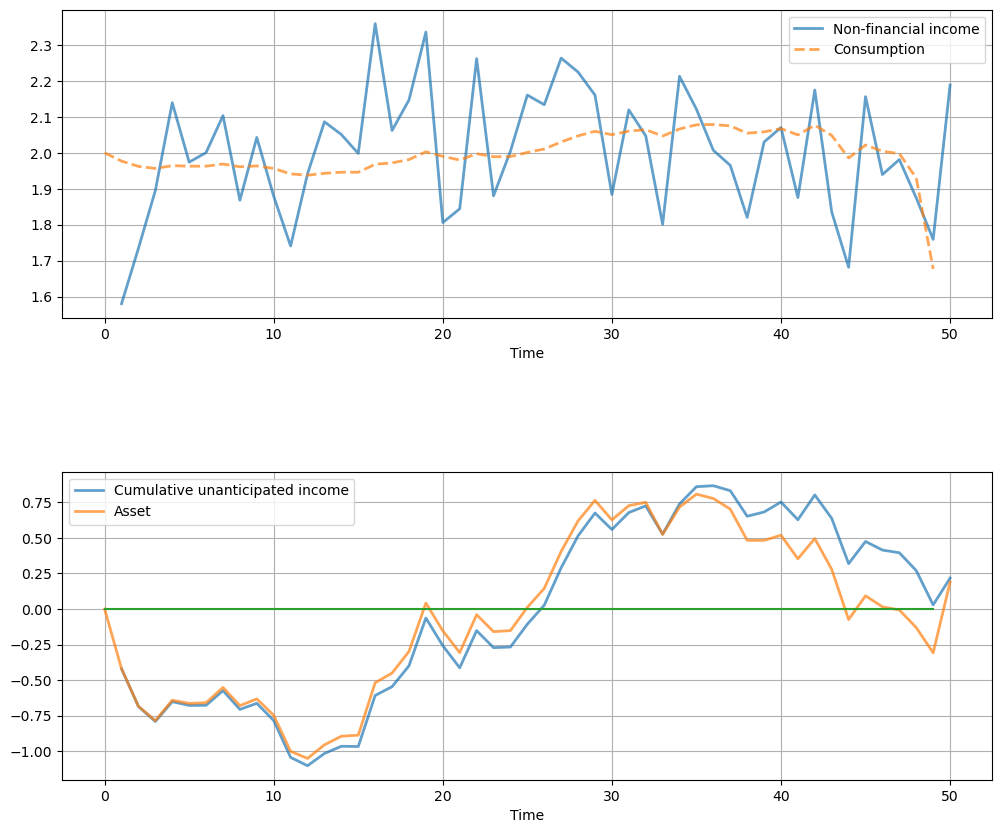

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ
rate = 0.05
beta = 1/(1 + rate)
periods = 50
base_cons = 1.5
sigma = 0.15
mu = 2
large_q = 1e4
Q_val = 1
R_mat = np.zeros((2, 2))
Rf_mat = np.zeros((2, 2))
Rf_mat[0, 0] = large_q
matrix_A = [[1 + rate, -base_cons + mu], [0, 1]]
matrix_B = [[-1], [0]]
matrix_C = [[sigma], [0]]
lq_model = LQ(Q_val, R_mat, matrix_A, matrix_B, matrix_C, beta=beta, T=periods, Rf=Rf_mat)
init_state = (0, 1)
x_path, u_path, w_path = lq_model.compute_sequence(init_state)
asset = x_path[0, :]
consump = u_path.flatten() + base_cons
income_data = sigma * w_path[0, 1:] + mu
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
axs[0].plot(list(range(1, periods+1)), income_data, '-', lw=2, alpha=0.7, label='Non-financial income')
axs[0].plot(list(range(periods)), consump, '--', lw=2, alpha=0.7,label='Consumption')
axs[0].legend()
axs[1].plot(list(range(1, periods+1)), np.cumsum(income_data - mu), '-', lw=2, alpha=0.7,label='Cumulative unanticipated income')
axs[1].plot(list(range(periods+1)), asset, '-', lw=2, alpha=0.7,label='Asset')
axs[1].plot(list(range(periods)), np.zeros(periods), '-')
axs[1].legend()
for ax in axs:
    ax.grid()
    ax.set_xlabel('Time')
plt.show()

Question 2：

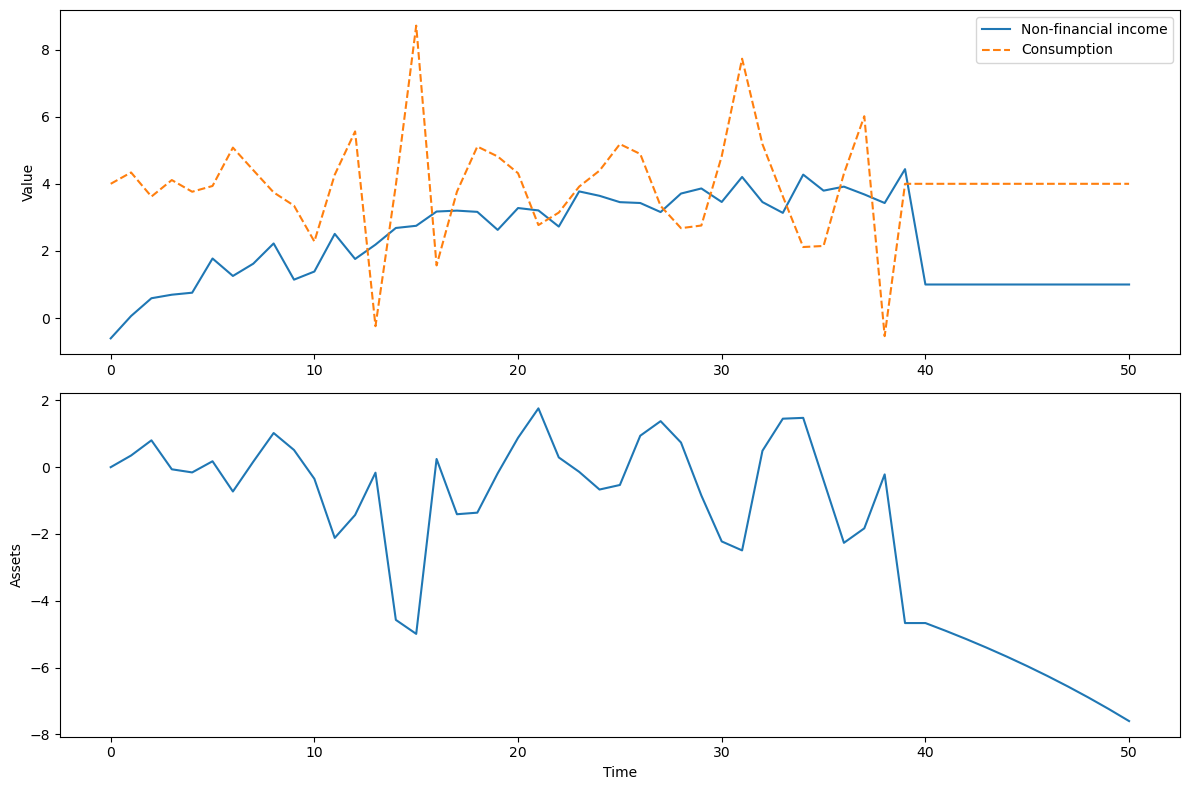

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
rate = 0.05
beta = 1/(1+rate)
base_cons = 4
mu_val = 4
sigma = 0.35
K_period = 40
total_T = 60
s_val = 1
large_q = 1e4
def calc_coeff(K, mu):
    m1 = mu/(K/2)
    m2 = -m1/(2*K)
    return m1, m2
m1_coeff, m2_coeff = calc_coeff(K_period, mu_val)
time_wrk = np.arange(K_period)
p_vals = m1_coeff*time_wrk + m2_coeff*time_wrk**2
y_retire = s_val * np.ones(total_T - K_period)
A_retire = np.eye(2)
B_retire = np.array([[1], [-1]])
C_retire = np.zeros((2,1))
R_retire = np.array([[0, 0], [0, 0]])
Q_retire = -1
lq_retire = LQ(Q_retire, R_retire, A_retire, B_retire, C_retire, beta=beta)
P_ret, F_ret, d_ret = lq_retire.stationary_values()
A_work = np.array([[1+rate, -1], [0, 1]])
B_work = np.array([[1], [0]])
C_work = np.array([[sigma], [0]])
R_work = np.array([[1, -1], [-1, 1]])
Q_work = -1
lq_work = LQ(Q_work, R_work, A_work, B_work, C_work, beta=beta, T=K_period, Rf=P_ret)
np.random.seed(123)
x_init = np.array([0, p_vals[0]])
sim_data = lq_work.compute_sequence(x_init, ts_length=K_period)
consump_new = np.hstack([sim_data[1][0,:-1].flatten() + base_cons, base_cons * np.ones(total_T-K_period)])
income_new = np.hstack([p_vals + sigma * np.random.randn(K_period), y_retire])
assets_new = np.hstack([sim_data[0][0, :K_period], sim_data[0][0, K_period-1] * (1+rate)**np.arange(total_T-K_period)])
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(income_new[:51], label='Non-financial income')
plt.plot(consump_new[:51], linestyle='--', label='Consumption')
plt.legend()
plt.ylabel('Value')
plt.subplot(2,1,2)
plt.plot(assets_new[:51])
plt.xlabel('Time')
plt.ylabel('Assets')
plt.tight_layout()
plt.show()

Question 3：

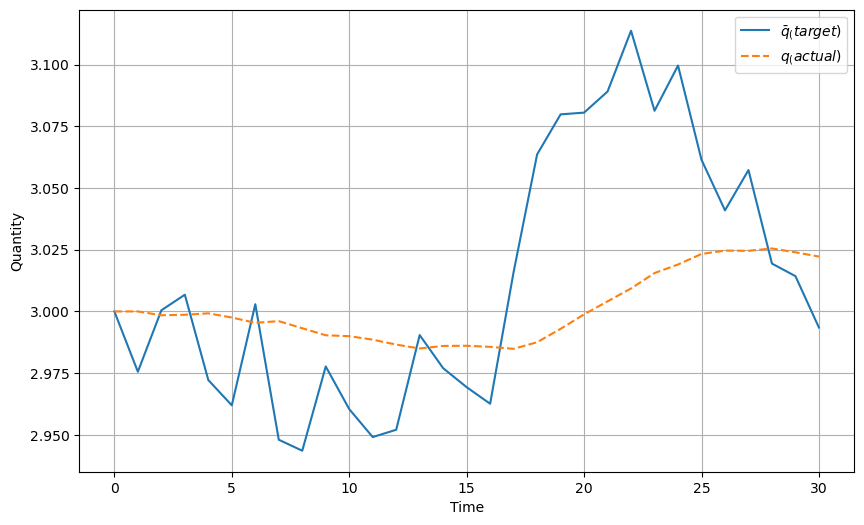

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
a0 = 5
a1 = 0.5
sig = 0.15
rho = 0.9
b = 0.95
c = 2
g = 25
ct = (1 - rho)*(a0 - c)/(2*a1)
AA = np.array([[rho, 0, ct], [0, 1, 0],[0, 0, 1]])
BB = np.array([[0],[1],[0]]).reshape(3,1)
CC = np.array([[sig/(2*a1)],[0],[0]])
RR = np.array([[-a1, a1, 0],[a1, -a1, 0],[0, 0, 0]])
QQ = -g
lq = LQ(QQ, RR, AA, BB, CC, beta=b)
PP, FF, dd = lq.stationary_values()
TT = 30
np.random.seed(123)
shk = sig * np.random.randn(TT)
d_seq = np.zeros(TT+1)
for t in range(TT):
    d_seq[t+1] = rho*d_seq[t] + shk[t]
x = np.array([(a0 - c + d_seq[0])/(2*a1),(a0 - c + d_seq[0])/(2*a1),1])
q_act = [x[1]]
q_tgt = [x[0]]
for t in range(TT):
    u = -FF @ x
    x = AA @ x + BB @ u + CC.flatten() * shk[t]
    q_act.append(x[1])
    q_tgt.append(x[0])
plt.figure(figsize=(10,6))
plt.plot(q_tgt, '-',label='$\\bar{q}_(target)$' )
plt.plot(q_act, '--', label='$q_(actual)$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

Question 4：

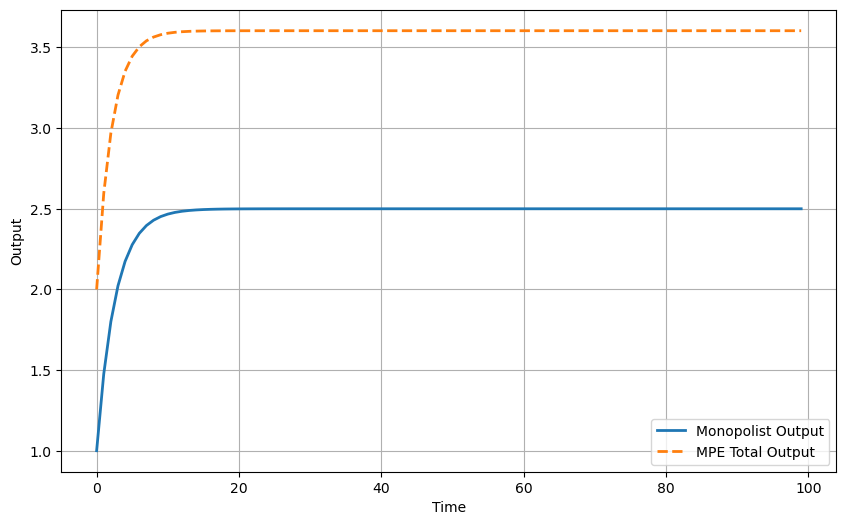

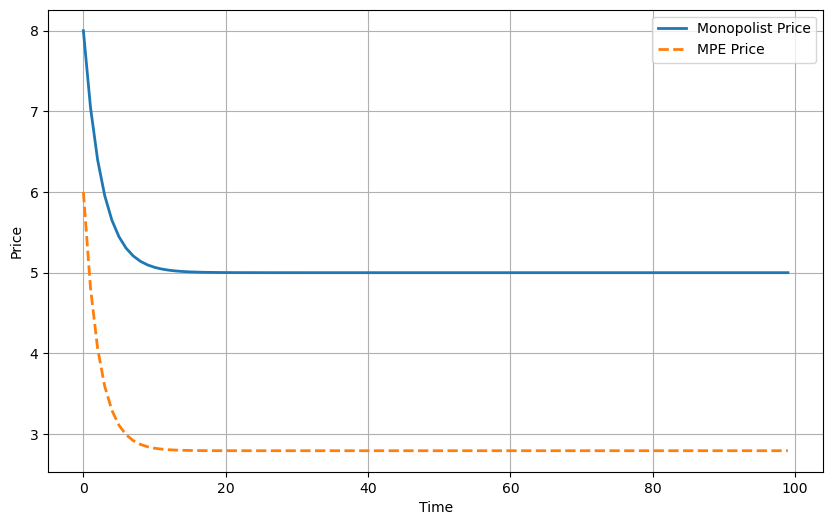

In [10]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

a0 = 10.0
a1 = 2.0
b = 0.96
g = 12.0
A_m = np.array([[1, 0], [0, 1]])
B_m = np.array([[0], [1]])
R_m = np.array([[0, -a0/2], [-a0/2, a1]])
Q_m = g
lq_m = qe.LQ(Q_m, R_m, A_m, B_m, beta=b)
P_m, F_m, d_m = lq_m.stationary_values()
F_flat = F_m.flatten()
TT = 100
x_m = np.zeros((2, TT))
x_m[:, 0] = [1, 1]
for t in range(TT-1):
    u_m = -np.dot(F_flat, x_m[:, t])
    x_next = A_m @ x_m[:, t] + B_m.flatten() * u_m
    x_m[:, t+1] = x_next
q_m = x_m[1, :]
p_m = a0 - a1 * q_m
A_d = np.eye(3)
B1_d = np.array([[0.], [1.], [0.]])
B2_d = np.array([[0.], [0.], [1.]])
R1_d = [[0, -a0/2, 0],
       [-a0/2, a1, a1/2],
       [0, a1/2, 0]]
R2_d = [[0, 0, -a0/2],
       [0, 0, a1/2],
       [-a0/2, a1/2, a1]]
Q1_d = Q2_d = g
S1 = S2 = M1 = M2 = 0.0
F1_d, F2_d, P1_d, P2_d = qe.nnash(A_d, B1_d, B2_d, R1_d, R2_d, Q1_d, Q2_d, S1, S2, M1, M2, M1, M2, beta=b)
AF_d = A_d - B1_d @ F1_d - B2_d @ F2_d
x_d = np.empty((3, TT))
x_d[:, 0] = [1, 1, 1]
for t in range(TT-1):
    x_d[:, t+1] = AF_d @ x_d[:, t]
q_d = x_d[1, :] + x_d[2, :]
p_d = a0 - a1 * q_d
t_axis = np.arange(TT)
plt.figure(figsize=(10, 6))
plt.plot(t_axis, q_m, '-', lw=2,label='Monopolist Output')
plt.plot(t_axis, q_d, '--', lw=2,label='MPE Total Output')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(t_axis, p_m, '-', lw=2, label='Monopolist Price')
plt.plot(t_axis, p_d, '--', lw=2, label='MPE Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Question 5：

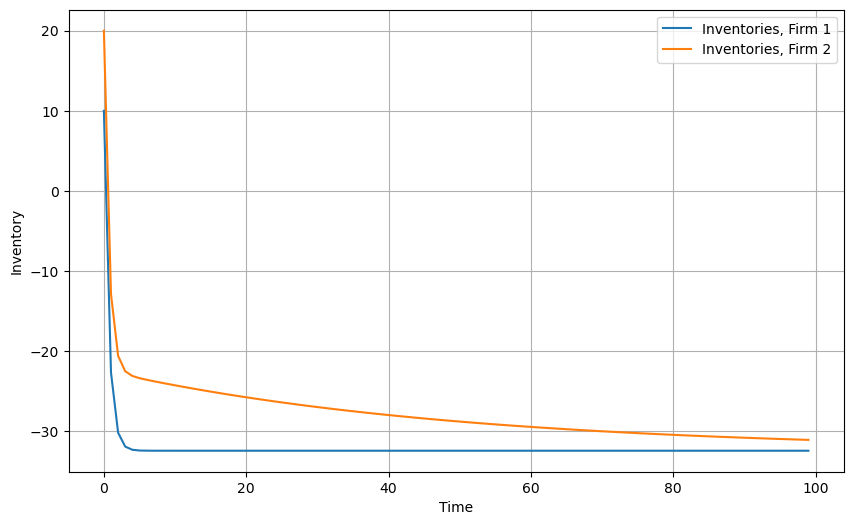

F1: [[-0.5 -0.  -0. ]
 [-0.  -0.5 -0. ]]
F2: [[-0.5 -0.  -0. ]
 [-0.  -0.5 -0. ]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
d = 0.02
D = np.array([[-1, 0.5], [0.5, -1]])
b_vec = np.array([25, 25])
c1 = np.array([1, -2, 1])
e1 = np.array([10, 10, 3])
c2 = np.array([0.8, -2.2, 1])
e2 = np.array([12, 9, 3.5])
n = 3
m = 2
A = np.eye(n)
B = np.array([[1, 0], [0, 1], [0, 0]])
C = np.zeros((n, n))
R = np.eye(m)
Q = np.eye(n)
P = solve(A.T @ Q @ A + Q - A.T @ Q @ B @ solve(R + B.T @ Q @ B, B.T @ Q @ A), Q)
F1 = -solve(R + B.T @ Q @ B, B.T @ Q @ A)
F2 = F1
TT = 100
I1 = np.zeros(TT)
I2 = np.zeros(TT)
I1[0] = 10
I2[0] = 20
for t in range(TT-1):
    x = np.array([I1[t], I2[t], 1])
    u1 = F1 @ x
    u2 = F2 @ x
    I1[t+1] = (1 - d)*I1[t] + u1[0] - (D[0,0]*u1[0] + D[0,1]*u2[0] + b_vec[0])
    I2[t+1] = (1 - d)*I2[t] + u2[0] - (D[1,0]*u1[0] + D[1,1]*u2[0] + b_vec[1])
plt.figure(figsize=(10, 6))
plt.plot(range(TT), I1,label='Inventories, Firm 1')
plt.plot(range(TT), I2,label='Inventories, Firm 2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Inventory')
plt.grid(True)
plt.show()
print("F1:", F1)
print("F2:", F2)